In [2]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [4]:

# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:

model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:

train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:

val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


[[[[0.07843138 0.07843138 0.07843138]
   [0.08686987 0.08686987 0.08686987]
   [0.13725491 0.13725491 0.13725491]
   ...
   [0.05419657 0.05419657 0.05419657]
   [0.09803922 0.09803922 0.09803922]
   [0.09803922 0.09803922 0.09803922]]

  [[0.07843138 0.07843138 0.07843138]
   [0.08682387 0.08682387 0.08682387]
   [0.13725491 0.13725491 0.13725491]
   ...
   [0.05415671 0.05415671 0.05415671]
   [0.09803922 0.09803922 0.09803922]
   [0.09803922 0.09803922 0.09803922]]

  [[0.07843138 0.07843138 0.07843138]
   [0.08677787 0.08677787 0.08677787]
   [0.13725491 0.13725491 0.13725491]
   ...
   [0.05411685 0.05411685 0.05411685]
   [0.09803922 0.09803922 0.09803922]
   [0.09803922 0.09803922 0.09803922]]

  ...

  [[0.03529412 0.03529412 0.03529412]
   [0.03529412 0.03529412 0.03529412]
   [0.00826497 0.00826497 0.00826497]
   ...
   [0.12156864 0.12156864 0.12156864]
   [0.11147323 0.11147323 0.11147323]
   [0.10980393 0.10980393 0.10980393]]

  [[0.03529412 0.03529412 0.03529412]
   [0.0

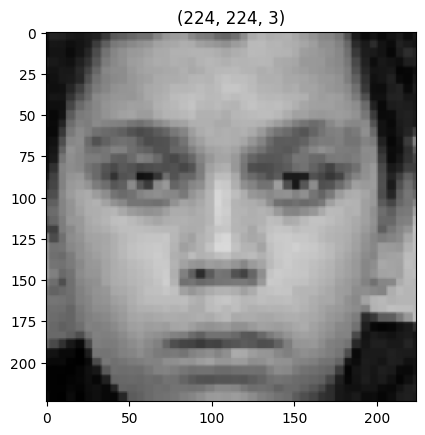

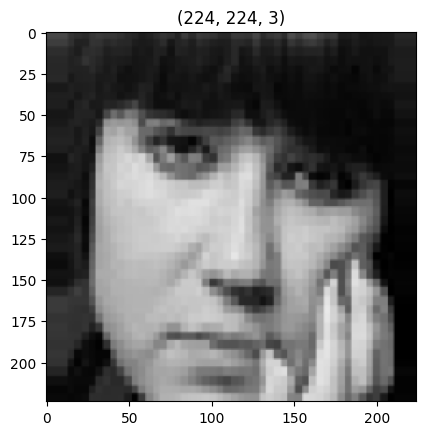

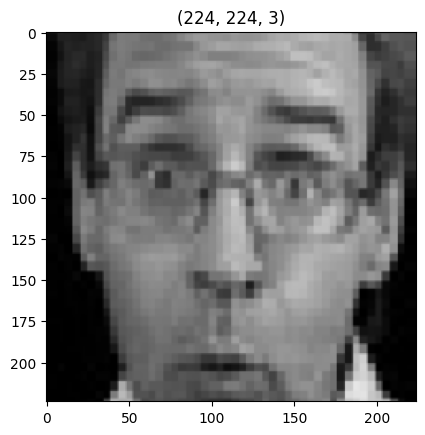

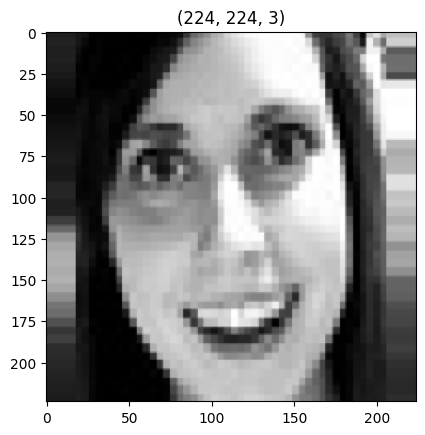

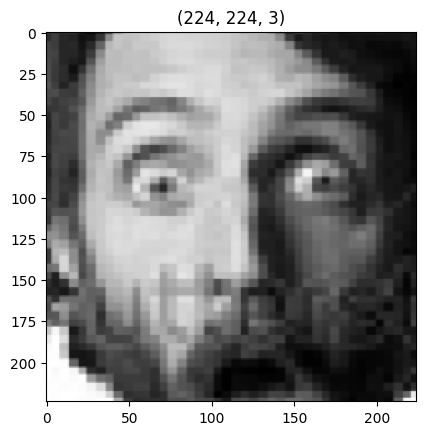

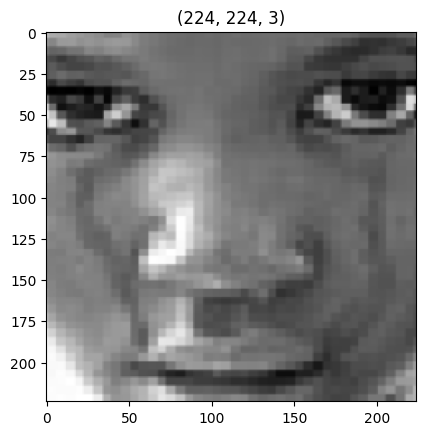

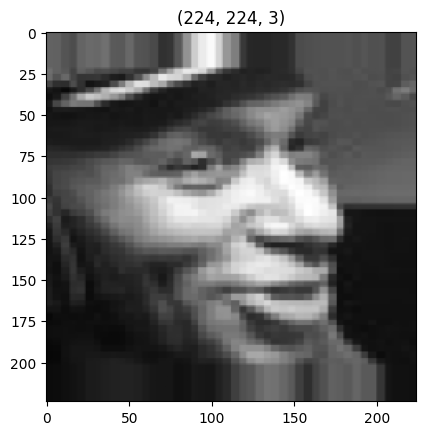

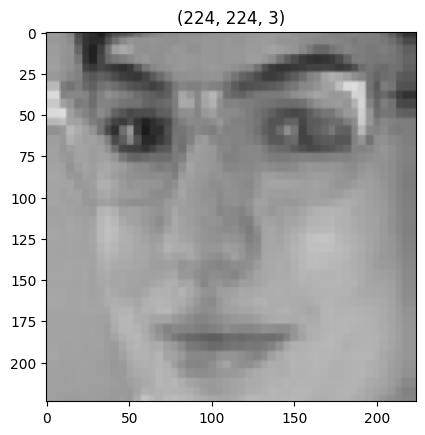

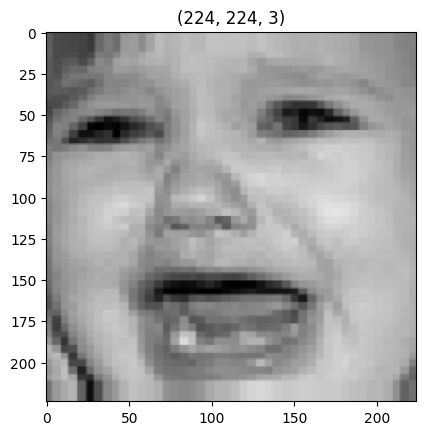

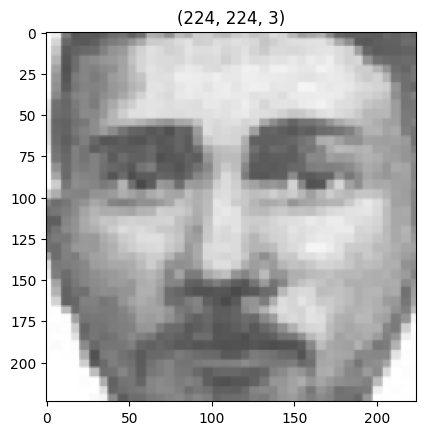

In [8]:

# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  print(img_arr)
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [9]:

## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
#es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [mc]
     

In [ ]:

hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 300, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[mc])
     

<ipython-input-10-edd1a970d14a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/300
10/10 [==============================] - ETA: 0s - loss: 12.9509 - accuracy: 0.2500
Epoch 1: val_accuracy improved from -inf to 0.23828, saving model to best_model.h5
10/10 [==============================] - 15s 448ms/step - loss: 12.9509 - accuracy: 0.2500 - val_loss: 12.6084 - val_accuracy: 0.2383
Epoch 2/300
10/10 [==============================] - ETA: 0s - loss: 9.8705 - accuracy: 0.3031
Epoch 2: val_accuracy improved from 0.23828 to 0.29297, saving model to best_model.h5
10/10 [==============================] - 5s 555ms/step - loss: 9.8705 - accuracy: 0.3031 - val_loss: 7.8915 - val_accuracy: 0.2930
Epoch 3/300
10/10 [==============================] - ETA: 0s - loss: 7.7969 - accuracy: 0.3562
Epoch 3: val_accuracy did not improve from 0.29297
10/10 [==============================] - 4s 386ms/step - loss: 7.7969 - accuracy: 0.3562 - val_loss: 6.5282 - val_accuracy: 0.2891
Epoch 4/300
10/10 [==============================] - ETA: 0s - loss: 6.7415 - accuracy: 0.3750
Epo

In [ ]:


# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")
     

In [ ]:

h =  hist.history
h.keys()

In [ ]:

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()
     

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:

# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
!pip install keras

In [ ]:
# path for the image to see if it predics correct class
# example of loading an image with the Keras API

from tensorflow.keras.utils import load_img
path = "/content/drive/MyDrive/Colab Notebooks/images-kafy/Screen Shot 2023-03-28 at 11.38.07 PM.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))



# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
     

print(f"EMOTION : {str.upper(op[pred])}")